<a href="https://colab.research.google.com/github/Mahmoud-Rady2000/Data-science/blob/main/Ananalysis_for_Cancer_to_select_best_corr_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries and packages

import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from scipy.stats import shapiro
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("dataset.csv")  #reading dataset

In [ ]:
df

,Unnamed: 0,Name,Layer,GEOID,Population,Longitude,Latitude,Demographics_Non_Hispanic_White,Demographics_Asian_or_Pacific_Islander,Demographics_Hispanic_or_Latino,...,Single_parent_households,Economic_Diversity_Index_2017_2021,Hardship_Index,Median_household_income_2017_2021,Per_capita_income_2017_2021,Poverty_rate,Teen_birth_rate,Foreign_born,Limited_English_proficiency,ADI
0,0,Albany Park,Community area,14,48549,-87.721558,41.968078,34.495242,12.451930,45.280683,...,7.710995,0.752265,59.736901,71978.41253,34864.51429,13.657000,28.5,35.135770,14.738710,28.834046
1,1,Archer Heights,Community area,57,14282,-87.726365,41.810873,14.750686,4.439907,79.806117,...,3.799376,0.789376,84.773833,51678.29415,23048.93405,8.464587,30.8,41.889546,18.642227,58.513862
2,2,Armour Square,Community area,34,13847,-87.633976,41.842083,14.238920,70.120541,5.624489,...,6.109288,0.771121,90.940999,37851.97289,26594.63189,25.722301,13.2,52.396118,35.648540,41.619232
3,3,Ashburn,Community area,70,41280,-87.708363,41.745756,9.999976,0.844624,42.398761,...,6.823247,0.803500,71.313241,72500.77616,25889.71966,13.419984,21.0,18.101837,5.633303,62.109405
4,4,Auburn Gresham,Community area,71,44959,-87.656305,41.744203,1.005905,0.255889,3.019450,...,15.401254,0.783514,83.634730,39607.97837,21743.74068,25.430221,34.1,2.732016,0.858271,70.441139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,72,West Lawn,Community area,65,33543,-87.726927,41.769774,12.045182,0.246147,84.915734,...,6.369291,0.787544,79.674882,64686.08111,24515.85154,14.872480,27.2,32.498527,15.673330,66.231050
73,73,West Pullman,Community area,53,25788,-87.635745,41.673820,0.864167,0.000005,7.157192,...,14.719137,0.790186,82.586261,48287.44711,23641.13559,23.094418,38.7,3.829046,1.347274,66.730967
74,74,West Ridge,Community area,2,77139,-87.695017,42.001583,42.276818,20.659340,19.594831,...,6.693775,0.777959,71.533768,61465.82990,28815.83038,17.058356,16.5,39.924082,11.605474,38.623172
75,75,West Town,Community area,24,87942,-87.676358,41.901216,63.088956,5.505216,21.004526,...,3.383988,0.520660,11.857673,121221.63710,73243.64059,8.993107,20.0,12.197229,4.183228,20.571289


In [ ]:
#we cant see all feaatures above because there are many num of features 140 columns
#Set the maximum number of columns to display here is none to view all
pd.set_option('display.max_columns', None)

# Now when you display your DataFrame, all columns will be shown
df

,Unnamed: 0,Name,Layer,GEOID,Population,Longitude,Latitude,Demographics_Non_Hispanic_White,Demographics_Asian_or_Pacific_Islander,Demographics_Hispanic_or_Latino,Demographics_Native_American,Demographics_Two_or_more_races,Demographics_Females,Demographics_Males,Demographics_Children,Demographics_Young_Adults,Demographics_Middle_Aged_Adults,Demographics_Adults,Demographics_Seniors,Alzheimers_disease_mortality_rate,Female_breast_cancer_mortality_rate,Cancer_mortality_rate,Coronary_heart_disease_mortality_rate,Colorectal_cancer_mortality_rate,Cervical_cancer_mortality_rate,Diabetes_mortality_rate,Diabetes_related_mortality_rate,Diet_related_mortality_rate,All_cause_mortality_rate,Heart_disease_mortality_rate,Lung_and_bronchus_cancer_mortality_rate,Chronic_lower_respiratory_disease_mortality_rate,Nephritis_nephrotic_syndrome_and_nephrosis_mortality_rate,Prostate_cancer_mortality_rate,Stroke_mortality_rate,Tobacco_related_mortality_rate,Annual_dental_cleaning_rate,Primary_care_provider_rate,Routine_checkup_rate,Uninsured_rate,Early_and_adequate_prenatal_care_rate,Prenatal_care_in_first_trimester_rate,Influenza_pneumonia_mortality_rate,Accidents_mortality_rate,Firearm_related_homicide_mortality_rate,Homicide_mortality_rate,Injury_mortality_rate,Motor_vehicle_crash_mortality_rate,Infant_mortality_rate,Life_expectancy,Years_of_Potential_Life_Lost,Breast_cancer_screening_rate,Cervical_cancer_screening_rate,Received_needed_care_rate,Aggravated_assault_battery,Burglary,Drug_abuse,Homicide,Larceny,Major_crime,Arson,Property_crime,Robbery,Criminal_sexual_assault,Motor_vehicle_theft,Public_crime,Violent_crime,Social_Vulnerability_Index,Evictions,Eviction_filing_rate,Eviction_rate,Crowded_housing,Severely_rent_burdened,Rent_burdened,Traffic_intensity,Vacant,Particulate_matter,Low_food_access,Opioid_related_overdoses,Opioid_related_overdose_mortality_rate,Invasive_breast_cancer_diagnosis_rate,Invasive_breast_cancer_diagnosis_rate_Late_Stage,Lung_cancer_diagnosis_rate,Lung_cancer_diagnosis_rate_Late_Stage,Leukemia_and_lymphoma_diagnosis_rate,Nervous_system_cancer_diagnosis_rate,Colorectal_cancer_diagnosis_rate,Colorectal_cancer_diagnosis_rate_Late_Stage,Prostate_cancer_diagnosis_rate,Cancer_diagnosis_rate,Cancer_diagnosis_rate_Late_Stage,Distant_systemic_cancer_diagnosis_rate,COVID_19_case_rate,COVID_19_hospitalization_rates,HIV_prevalence_rate,Chlamydia_rate,Traffic_crashes,Lead_poisoning_rate,Birth_rate,Low_birthweight_rate,Cesarean_delivery_rate,General_fertility_rate,Mean_age_at_first_birth,Preterm_births_rate,Total_fertility_rate,Twin_birth_rate,Very_low_birthweight_rate,Disability,Hearing_difficulty,Vision_difficulty,Cognitive_difficulty,Ambulatory_difficulty,Independent_living_difficulty,Self_care_difficulty,Overall_health_status_excellent_very_good_good_rate,Food_stamps,Households_in_poverty_not_receiving_food_stamps,Public_assistance_income,Alcohol_induced_mortality_rate,Drug_induced_mortality_rate,Drug_overdose_mortality_rate,Chronic_liver_disease_and_cirrhosis_mortality_rate,Suicide_mortality_rate,Neighborhood_safety_rate,High_school_graduation_rate,College_graduation_rate,Unemployment_rate,Child_Opportunity_Index_2_0_ED_2015,Child_Opportunity_Index_2_0_HE_2015,Child_Opportunity_Index_2_0_2015,Child_Opportunity_Index_2_0_SE_2015,Single_parent_households,Economic_Diversity_Index_2017_2021,Hardship_Index,Median_household_income_2017_2021,Per_capita_income_2017_2021,Poverty_rate,Teen_birth_rate,Foreign_born,Limited_English_proficiency,ADI
0,0,Albany Park,Community area,14,48549,-87.721558,41.968078,34.495242,12.451930,45.280683,0.000003,2.642273,49.443697,50.556303,22.202183,38.877002,29.175560,68.052562,9.745254,21.6,23.4,152.3,90.2,17.1,2.7,23.5,67.2,300.3,716.8,167.6,29.3,27.2,16.2,10.8,66.1,229.1,52.8,68.9,73.8,17.613715,75.1,72.4,22.0,28.8,2.7,4.2,43.0,3.4,7.1,77.955117,5544,84.319808,73.148035,85.4,113.255541,113.508724,40.410212,3.515648,504.191103,958.975814,3.673939,731.689269,96.339196,17.961164,116.560901,318,227.286545,75.0

In [ ]:
df['Layer'].nunique()   # 1 category so we can drop it

1

In [ ]:
#Drop unimportant features
columns_to_drop = ['Name', 'Layer','Unnamed: 0']

# Use the drop() method to remove the specified columns
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,GEOID,Population,Longitude,Latitude,Demographics_Non_Hispanic_White,Demographics_Asian_or_Pacific_Islander,Demographics_Hispanic_or_Latino,Demographics_Native_American,Demographics_Two_or_more_races,Demographics_Females,Demographics_Males,Demographics_Children,Demographics_Young_Adults,Demographics_Middle_Aged_Adults,Demographics_Adults,Demographics_Seniors,Alzheimers_disease_mortality_rate,Female_breast_cancer_mortality_rate,Cancer_mortality_rate,Coronary_heart_disease_mortality_rate,Colorectal_cancer_mortality_rate,Cervical_cancer_mortality_rate,Diabetes_mortality_rate,Diabetes_related_mortality_rate,Diet_related_mortality_rate,All_cause_mortality_rate,Heart_disease_mortality_rate,Lung_and_bronchus_cancer_mortality_rate,Chronic_lower_respiratory_disease_mortality_rate,Nephritis_nephrotic_syndrome_and_nephrosis_mortality_rate,Prostate_cancer_mortality_rate,Stroke_mortality_rate,Tobacco_related_mortality_rate,Annual_dental_cleaning_rate,Primary_care_provider_rate,Routine_checkup_rate,Uninsured_rate,Early_and_adequate_prenatal_care_rate,Prenatal_care_in_first_trimester_rate,Influenza_pneumonia_mortality_rate,Accidents_mortality_rate,Firearm_related_homicide_mortality_rate,Homicide_mortality_rate,Injury_mortality_rate,Motor_vehicle_crash_mortality_rate,Infant_mortality_rate,Life_expectancy,Years_of_Potential_Life_Lost,Breast_cancer_screening_rate,Cervical_cancer_screening_rate,Received_needed_care_rate,Aggravated_assault_battery,Burglary,Drug_abuse,Homicide,Larceny,Major_crime,Arson,Property_crime,Robbery,Criminal_sexual_assault,Motor_vehicle_theft,Public_crime,Violent_crime,Social_Vulnerability_Index,Evictions,Eviction_filing_rate,Eviction_rate,Crowded_housing,Severely_rent_burdened,Rent_burdened,Traffic_intensity,Vacant,Particulate_matter,Low_food_access,Opioid_related_overdoses,Opioid_related_overdose_mortality_rate,Invasive_breast_cancer_diagnosis_rate,Invasive_breast_cancer_diagnosis_rate_Late_Stage,Lung_cancer_diagnosis_rate,Lung_cancer_diagnosis_rate_Late_Stage,Leukemia_and_lymphoma_diagnosis_rate,Nervous_system_cancer_diagnosis_rate,Colorectal_cancer_diagnosis_rate,Colorectal_cancer_diagnosis_rate_Late_Stage,Prostate_cancer_diagnosis_rate,Cancer_diagnosis_rate,Cancer_diagnosis_rate_Late_Stage,Distant_systemic_cancer_diagnosis_rate,COVID_19_case_rate,COVID_19_hospitalization_rates,HIV_prevalence_rate,Chlamydia_rate,Traffic_crashes,Lead_poisoning_rate,Birth_rate,Low_birthweight_rate,Cesarean_delivery_rate,General_fertility_rate,Mean_age_at_first_birth,Preterm_births_rate,Total_fertility_rate,Twin_birth_rate,Very_low_birthweight_rate,Disability,Hearing_difficulty,Vision_difficulty,Cognitive_difficulty,Ambulatory_difficulty,Independent_living_difficulty,Self_care_difficulty,Overall_health_status_excellent_very_good_good_rate,Food_stamps,Households_in_poverty_not_receiving_food_stamps,Public_assistance_income,Alcohol_induced_mortality_rate,Drug_induced_mortality_rate,Drug_overdose_mortality_rate,Chronic_liver_disease_and_cirrhosis_mortality_rate,Suicide_mortality_rate,Neighborhood_safety_rate,High_school_graduation_rate,College_graduation_rate,Unemployment_rate,Child_Opportunity_Index_2_0_ED_2015,Child_Opportunity_Index_2_0_HE_2015,Child_Opportunity_Index_2_0_2015,Child_Opportunity_Index_2_0_SE_2015,Single_parent_households,Economic_Diversity_Index_2017_2021,Hardship_Index,Median_household_income_2017_2021,Per_capita_income_2017_2021,Poverty_rate,Teen_birth_rate,Foreign_born,Limited_English_proficiency,ADI
0,14,48549,-87.721558,41.968078,34.495242,12.451930,45.280683,0.000003,2.642273,49.443697,50.556303,22.202183,38.877002,29.175560,68.052562,9.745254,21.6,23.4,152.3,90.2,17.1,2.7,23.5,67.2,300.3,716.8,167.6,29.3,27.2,16.2,10.8,66.1,229.1,52.8,68.9,73.8,17.613715,75.1,72.4,22.0,28.8,2.7,4.2,43.0,3.4,7.1,77.955117,5544,84.319808,73.148035,85.4,113.255541,113.508724,40.410212,3.515648,504.191103,958.975814,3.673939,731.689269,96.339196,17.961164,116.560901,318,227.286545,75.070969,54.109558,1.262075,0.511247,5.149535,17.55461

In [ ]:
df

,GEOID,Population,Longitude,Latitude,Demographics_Non_Hispanic_White,Demographics_Asian_or_Pacific_Islander,Demographics_Hispanic_or_Latino,Demographics_Native_American,Demographics_Two_or_more_races,Demographics_Females,Demographics_Males,Demographics_Children,Demographics_Young_Adults,Demographics_Middle_Aged_Adults,Demographics_Adults,Demographics_Seniors,Alzheimers_disease_mortality_rate,Female_breast_cancer_mortality_rate,Cancer_mortality_rate,Coronary_heart_disease_mortality_rate,Colorectal_cancer_mortality_rate,Cervical_cancer_mortality_rate,Diabetes_mortality_rate,Diabetes_related_mortality_rate,Diet_related_mortality_rate,All_cause_mortality_rate,Heart_disease_mortality_rate,Lung_and_bronchus_cancer_mortality_rate,Chronic_lower_respiratory_disease_mortality_rate,Nephritis_nephrotic_syndrome_and_nephrosis_mortality_rate,Prostate_cancer_mortality_rate,Stroke_mortality_rate,Tobacco_related_mortality_rate,Annual_dental_cleaning_rate,Primary_care_provider_rate,Routine_checkup_rate,Uninsured_rate,Early_and_adequate_prenatal_care_rate,Prenatal_care_in_first_trimester_rate,Influenza_pneumonia_mortality_rate,Accidents_mortality_rate,Firearm_related_homicide_mortality_rate,Homicide_mortality_rate,Injury_mortality_rate,Motor_vehicle_crash_mortality_rate,Infant_mortality_rate,Life_expectancy,Years_of_Potential_Life_Lost,Breast_cancer_screening_rate,Cervical_cancer_screening_rate,Received_needed_care_rate,Aggravated_assault_battery,Burglary,Drug_abuse,Homicide,Larceny,Major_crime,Arson,Property_crime,Robbery,Criminal_sexual_assault,Motor_vehicle_theft,Public_crime,Violent_crime,Social_Vulnerability_Index,Evictions,Eviction_filing_rate,Eviction_rate,Crowded_housing,Severely_rent_burdened,Rent_burdened,Traffic_intensity,Vacant,Particulate_matter,Low_food_access,Opioid_related_overdoses,Opioid_related_overdose_mortality_rate,Invasive_breast_cancer_diagnosis_rate,Invasive_breast_cancer_diagnosis_rate_Late_Stage,Lung_cancer_diagnosis_rate,Lung_cancer_diagnosis_rate_Late_Stage,Leukemia_and_lymphoma_diagnosis_rate,Nervous_system_cancer_diagnosis_rate,Colorectal_cancer_diagnosis_rate,Colorectal_cancer_diagnosis_rate_Late_Stage,Prostate_cancer_diagnosis_rate,Cancer_diagnosis_rate,Cancer_diagnosis_rate_Late_Stage,Distant_systemic_cancer_diagnosis_rate,COVID_19_case_rate,COVID_19_hospitalization_rates,HIV_prevalence_rate,Chlamydia_rate,Traffic_crashes,Lead_poisoning_rate,Birth_rate,Low_birthweight_rate,Cesarean_delivery_rate,General_fertility_rate,Mean_age_at_first_birth,Preterm_births_rate,Total_fertility_rate,Twin_birth_rate,Very_low_birthweight_rate,Disability,Hearing_difficulty,Vision_difficulty,Cognitive_difficulty,Ambulatory_difficulty,Independent_living_difficulty,Self_care_difficulty,Overall_health_status_excellent_very_good_good_rate,Food_stamps,Households_in_poverty_not_receiving_food_stamps,Public_assistance_income,Alcohol_induced_mortality_rate,Drug_induced_mortality_rate,Drug_overdose_mortality_rate,Chronic_liver_disease_and_cirrhosis_mortality_rate,Suicide_mortality_rate,Neighborhood_safety_rate,High_school_graduation_rate,College_graduation_rate,Unemployment_rate,Child_Opportunity_Index_2_0_ED_2015,Child_Opportunity_Index_2_0_HE_2015,Child_Opportunity_Index_2_0_2015,Child_Opportunity_Index_2_0_SE_2015,Single_parent_households,Economic_Diversity_Index_2017_2021,Hardship_Index,Median_household_income_2017_2021,Per_capita_income_2017_2021,Poverty_rate,Teen_birth_rate,Foreign_born,Limited_English_proficiency,ADI
0,14,48549,-87.721558,41.968078,34.495242,12.451930,45.280683,0.000003,2.642273,49.443697,50.556303,22.202183,38.877002,29.175560,68.052562,9.745254,21.6,23.4,152.3,90.2,17.1,2.7,23.5,67.2,300.3,716.8,167.6,29.3,27.2,16.2,10.8,66.1,229.1,52.8,68.9,73.8,17.613715,75.1,72.4,22.0,28.8,2.7,4.2,43.0,3.4,7.1,77.955117,5544,84.319808,73.148035,85.4,113.255541,113.508724,40.410212,3.515648,504.191103,958.975814,3.673939,731.689269,96.339196,17.961164,116.560901,318,227.286545,75.070969,54.109558,1.262075,0.511247,5.149535,17.55461

## Normally ditriputed refers to a statistical distribution where the data is symmetrically distributed around the mean

Sheck the naormallity for all features and print columns that are normally distriputed

In [ ]:
def check_normality(df):
    normality_results = {}
    num_normal_columns = 0

    for column in df.columns:
        # Perform Shapiro-Wilk test for normality
        stat, p = shapiro(df[column])

        # Check if the p-value is less than 0.05 (common significance level)
        is_normal = p > 0.05

        # Store the result for this column
        normality_results[column] = {'statistic': stat, 'p_value': p, 'is_normal': is_normal}

        # Print the normality result if the column is normally distributed
        if is_normal:
            print(f"Column '{column}' is normally distributed.")
            num_normal_columns += 1

    print(f"Number of normally distributed columns: {num_normal_columns}")

    return normality_results

normality_results = check_normality(df)
print(normality_results)

Column 'Longitude' is normally distributed.
Column 'Demographics_Females' is normally distributed.
Column 'Demographics_Males' is normally distributed.
Column 'Demographics_Children' is normally distributed.
Column 'Demographics_Middle_Aged_Adults' is normally distributed.
Column 'Alzheimers_disease_mortality_rate' is normally distributed.
Column 'Diet_related_mortality_rate' is normally distributed.
Column 'Stroke_mortality_rate' is normally distributed.
Column 'Annual_dental_cleaning_rate' is normally distributed.
Column 'Primary_care_provider_rate' is normally distributed.
Column 'Routine_checkup_rate' is normally distributed.
Column 'Early_and_adequate_prenatal_care_rate' is normally distributed.
Column 'Prenatal_care_in_first_trimester_rate' is normally distributed.
Column 'Cervical_cancer_screening_rate' is normally distributed.
Column 'Rent_burdened' is normally distributed.
Column 'Particulate_matter' is normally distributed.
Column 'Invasive_breast_cancer_diagnosis_rate' is no

**Checking by another method like shapiro, histogram,Q-Q plot (Quantile-Quantile plot)**

---



In [ ]:
x=df['Teen_birth_rate']  # the last column in the 27 columns that are normally distriputed (Shapiro)

In [ ]:
# Perform Shapiro-Wilk test
statistic, p_value = shapiro(x)

# Interpret the results
alpha = 0.05
print("Shapiro-Wilk Test Results:")
print(f"Test Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value > alpha:
    print("The data looks normally distributed (fail to reject H0)")
else:
    print("The data does not look normally distributed (reject H0)")


Shapiro-Wilk Test Results:
Test Statistic: 0.9734
P-value: 0.1054
The data looks normally distributed (fail to reject H0)


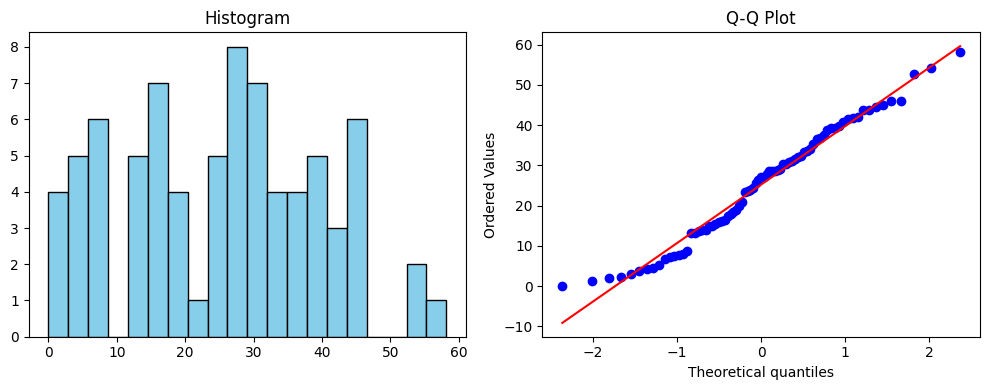

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(x, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram')

# Plot Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(x, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

check for another example that is not normally distriputed

In [ ]:
y=df['Motor_vehicle_crash_mortality_rate']  # not normally distriputed feature

In [ ]:
# Perform Shapiro-Wilk test
statistic, p_value = shapiro(y)

# Interpret the results
alpha = 0.05
print("Shapiro-Wilk Test Results:")
print(f"Test Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value > alpha:
    print("The data looks normally distributed (fail to reject H0)")
else:
    print("The data does not look normally distributed (reject H0)")

Shapiro-Wilk Test Results:
Test Statistic: 0.9178
P-value: 0.0001
The data does not look normally distributed (reject H0)


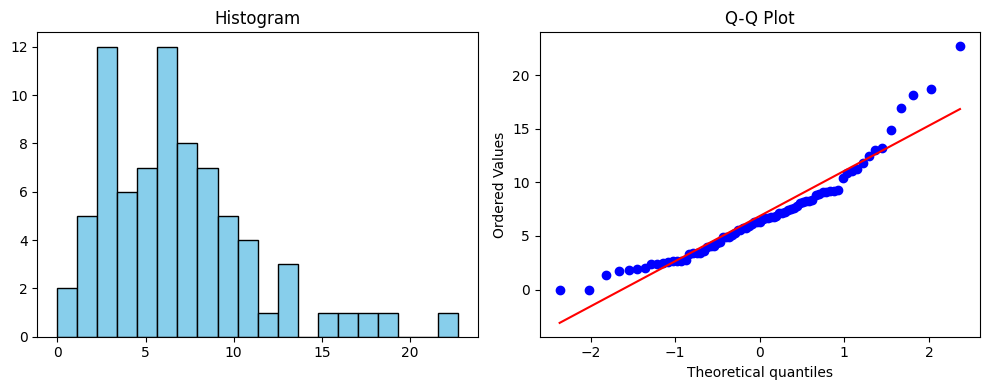

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(y, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram')

# Plot Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(y, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

we can see in the previous histogram that the data is not normally distriputed and the most data are shifted to lift

# so our result will be :

# 80.43% of features are not normally disrupted (111/138 features)
# 19.57% of features are normally disrupted ( 27/138 features)


1  Column 'Longitude' is normally distributed.

2  Column 'Demographics_Females' is normally distributed.

3  Column 'Demographics_Males' is normally distributed.

4  Column 'Demographics_Children' is normally distributed.

5  Column 'Demographics_Middle_Aged_Adults' is normally distributed.

6  Column 'Alzheimers_disease_mortality_rate' is normally distributed.

7  Column 'Diet_related_mortality_rate' is normally distributed.

8  Column 'Stroke_mortality_rate' is normally distributed.

9  Column 'Annual_dental_cleaning_rate' is normally distributed.

10 Column 'Primary_care_provider_rate' is normally distributed.

11 Column 'Routine_checkup_rate' is normally distributed.

12 Column 'Early_and_adequate_prenatal_care_rate' is normally distributed.

13 Column 'Prenatal_care_in_first_trimester_rate' is normally distributed.

14 Column 'Cervical_cancer_screening_rate' is normally distributed.

15 Column 'Rent_burdened' is normally distributed.

16 Column 'Particulate_matter' is normally distributed.

17 Column 'Invasive_breast_cancer_diagnosis_rate' is normally distributed.

18 Column 'Birth_rate' is normally distributed.

19 Column 'Cesarean_delivery_rate' is normally distributed.

20 Column 'General_fertility_rate' is normally distributed.

21 Column 'Mean_age_at_first_birth' is normally distributed.

22 Column 'Twin_birth_rate' is normally distributed.

23 Column 'Households_in_poverty_not_receiving_food_stamps' is normally distributed.

24 Column 'Alcohol_induced_mortality_rate' is normally distributed.

25 Column 'Chronic_liver_disease_and_cirrhosis_mortality_rate' is normally distributed.

26 Column 'Suicide_mortality_rate' is normally distributed.

27 Column 'Teen_birth_rate' is normally distributed

# all other features are not normally distriputed  80.43% of features

# So we can say that most of our data are not normally distriputed.

Until now we can say that Spearman correlation will be suitable because most of data are not normally distriputed but we still need to know more things about data like linearity (the relationship between variables is linear or not), if the data contain many outliers or not .....etc.

Mahmoud Mohamed Rady.  2024